# Introduzione

## Descrizione del dataset
Il dataset analizza un campione di gamer internazionali e raccoglie informazioni psicologiche, demografiche e comportamentali.
Le variabili principali si suddividono in tre categorie:

- Indicatori psicologici: risposte ai questionari GAD-7 (ansia), SPIN (fobia sociale) e SWL (soddisfazione di vita), da cui sono stati calcolati i punteggi totali GAD_T, SPIN_T e SWL_T.

- Comportamento di gioco: informazioni su gioco preferito (Game), piattaforma (Platform), ore di gioco settimanali (Hours), livello competitivo (League)

- Dati demografici: età (Age), genere (Gender), titolo di studio (Degree), occupazione (Work), paese di nascita e residenza.

La variabile **target** scelta per l’analisi è **SWL_T (Satisfaction With Life Total Score)**, mentre le altre variabili vengono utilizzate come predittori nel modello di regressione.

### Fattori psicologici
GAD (Generalized Anxiety Disorder)
- GAD1 - GAD7: Punteggi individuali alle domande del questionario GAD
- GAD_T: Total GAD score (0–21)
    - 0-4: ansia minima
    - 5-9: ansia lieve
    - 10-14: ansia moderata
    - 15-21: ansia grave

SWL (Satisfaction With Life)
- SWL1 - SWL5: Punteggi individuali alle domande del questionario SWL
- SWL_T: Total SWL score (5–35)
    - 31-35: estremamente soddisfatto
    - 26-30: soddisfatto
    - 21-25: leggermente soddisfatto
    - 20: neutrale
    - 15-19: leggermente insoddisfatto
    - 10-14: insoddisfatto
    - 5-9: estremamente insoddisfatto

SPIN (Social Phobia Inventory)
- SPIN1 - SPIN17: Punteggi individuali alle domande del questionario SPIN
- SPIN_T: Total SPIN score (0–68)
    - 0-20: nessuna ansia sociale
    - 21-30: ansia sociale lieve
    - 31-40: ansia sociale moderata
    - 41-50: ansia sociale grave
    - 51-68: ansia sociale molto grave

## Note
Il dataset è stato pubblicato il 30 ottobre 2017. Le modalità di gioco e le suddivisioni [ELO](https://it.wikipedia.org/wiki/Elo_(scacchi)) sono mutate nel corso degli anni. In questo documento si fa analisi considerando le suddivisioni di quando i dati sono stati raccolti.

# Cleanup del dataset

In [54]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("GamingStudy_data.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [55]:
print("Numero di colonne con valori mancanti: ", dataset.isna().any().sum())
print("Numero di valori mancanti per colonna:")
dataset.isna().sum()[dataset.isna().sum() > 0]

Numero di colonne con valori mancanti:  30
Numero di valori mancanti per colonna:


GADE                 649
Hours                 30
League              1852
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Work                  38
Degree              1577
Reference             15
accept               414
SPIN_T               650
Residence_ISO3       110
Birthplace_ISO3      121
dtype: int64

La colonna 'highestleague' non contiene nessun valore quindi è possibile eliminarla. 'streams' non contiene valori utili ai fini dell'analisi

In [56]:
dataset.drop(columns=['highestleague', 'streams'], inplace=True)
dataset.dropna(subset=['SPIN_T'], inplace=True)
dataset.dropna(subset=['Work'], inplace=True)
dataset.dropna(subset=['Degree'], inplace=True)
dataset.drop(['S. No.' , 'Timestamp'] , axis = 1 , inplace = True)

In [57]:
print("Elementi duplicati: ", dataset.duplicated().sum())
dataset = dataset.drop_duplicates()
print("Elementi duplicati dopo rimozione: ", dataset.duplicated().sum())

Elementi duplicati:  43
Elementi duplicati dopo rimozione:  0


In [58]:
dataset["Degree"] = dataset["Degree"].str.replace('\ufffd', ' ')
print(dataset.Degree.value_counts())

Degree
High school diploma (or equivalent)    8077
Bachelor (or equivalent)               2557
Master (or equivalent)                  532
Ph.D., Psy. D., MD (or equivalent)       91
Name: count, dtype: int64


### Scelta di gioco

In [59]:
print("Giochi distinti:", dataset['Game'].dropna().unique())
# counts for each value (shows NaN count if any)
print("\nConteggio dei valori per gioco (inclusi NaN):")
print(dataset['Game'].value_counts(dropna=False))

Giochi distinti: ['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']

Conteggio dei valori per gioco (inclusi NaN):
Game
League of Legends      9422
Other                   882
Starcraft 2             299
Counter Strike          242
World of Warcraft       133
Hearthstone              90
Diablo 3                 77
Heroes of the Storm      39
Guild Wars 2             33
Skyrim                   22
Destiny                  18
Name: count, dtype: int64


Il gioco dominante del dataset è *League of Legends*. Poiché le modalità di gioco (competitività, categoria...) influiscono sui fattori psicologici e la sproporzione di risposte non consenta un'analisi approfondita, si considera la sola valutazione dei dati relativi a *League of Legends*

In [60]:
lol_dataset = dataset[dataset['Game'] == 'League of Legends'].copy()

## Cleanup dei ranghi (League)

In [61]:
lol_dataset.League = lol_dataset.League.str.lower().str.strip()
# Prende la prima parola
lol_dataset["League"] = lol_dataset["League"].str.extract(r'^([a-z]+)')
print(lol_dataset["League"].value_counts().head(50))
print(lol_dataset["League"].nunique())


League
gold           2356
silver         1706
platinum       1353
diamond        1081
plat            448
bronze          405
unranked        392
master           71
platin           64
platinium        63
challenger       50
d                36
not              31
s                25
g                24
none             18
placements       14
platnium         12
masters           9
i                 9
challenjour       8
currently         8
sliver            8
dia               7
p                 7
still             6
b                 6
high              5
platine           5
was               5
haven             5
no                4
don               4
na                4
season            4
unraked           4
league            3
platium           3
lol               3
n                 3
golf              3
placement         2
peaked            2
wood              2
last              2
bronce            2
never             2
the               2
provisional       2
plarinum     

In [62]:
golds = ['g', 'gv', 'golden' ,'glod' ,'golld' ,'golf', 'goled', 'golderino' ,'giii']
lol_dataset['League'] = lol_dataset.League.replace(golds , 'gold')
silvers = [ 'silverii' , 's' , 'sliver' , 'siver' , 'silber' , 'sil' , 'silveriv']
lol_dataset['League'] = lol_dataset.League.replace(silvers , 'silver')
plats = [
    'platinium' , 'platnium' , 'platin' ,'pplatinum' ,'plarinum' ,'platium', 'p' ,'platine' ,
    'platinun' ,'platonum' ,'platnum', 'plata' ,'plantinum',
    'platinuim' ,'platunum', 'plantinum' ,'platunum' ,'platinumm' ,'platv' ,'platina' , 'plat' 
]
lol_dataset['League'] = lol_dataset.League.replace(plats , 'platinum')
bronzers = ['bronce' , 'b' , 'broze' ,'lowest' , 'wood', 'elohell'] 
lol_dataset['League'] = lol_dataset.League.replace(bronzers , 'bronze')
unranked = ['none' ,'na', 'not' ,'n' ,'promos' ,'provisional' ,'placements' , 'dont' , 'was', 'unraked',
            'havent', 'never', 'nope', 'no', 'noone', 'don', 'of', 'unrranked', 'new', 'what', 'unrank' ,
            'ranked', 'placement', 'unrankt' , 'non', 'unfranked' , 'promotion', 'idk',
            'unplaced', 'probably', 'provisionals', 'didnt' ,'unrakned' , 'unfinished' , 'just' , 'x' ,
            'promotions' , 'unseeded' , 'haven', 'uwot', 'spanish', 'around', 'finishing', 'ahgl','i', 'currently', 'still', 'high', 'season', 'lol', 'last', 'league', 'got', 'the', 'peaked', 'in', 'atm', 'were', 'ex', 'finished', 'will', 'climbing', 'yes', 'csgo', 'unable', 'under', 'having', 'if', 'level', 'lissandra', 'north', 'low', 'ended', 'doing', 'pre', 'zilean', 'aram', 'lvl', 'current', 'first', 'recently', 'challenged', 'soloq', 'cardboard', 'seaon', 'almost', 'legendary', 'german', 'placed', 'un', 'eu', 'qualifiying', 'euw']
lol_dataset['League'] = lol_dataset.League.replace(unranked , 'unranked')
diamonds =  ['d', 'dia', 'diaomnd', 'diamont','diamomd']
lol_dataset['League'] = lol_dataset.League.replace(diamonds , 'diamond')
gm =  ['grand', 'gm', 'grandmasters']
lol_dataset['League'] = lol_dataset.League.replace(gm , 'grandmaster')
chall =  ['challenjour', 'c', 'charrenjour', 'challeneger']
lol_dataset['League'] = lol_dataset.League.replace(chall , 'challenger')
lol_dataset['League'] = lol_dataset['League'].replace('masters', 'master') 
lol_dataset.League.value_counts()


League
gold          2390
platinum      1965
silver        1743
diamond       1126
unranked       594
bronze         416
master          80
challenger      59
Name: count, dtype: int64

## Trasformazione dei dati

In *League of Legends* i giocatori possono scegliere di giocare partite **competitive** o **normali**. Nelle competitive viene misurato il rank/rango che è il valore colonna 'League' nel dataset. Questo assume valori da Bronze (minimo) a Challenger (massimo). Si assegnano quindi valori da 1-7 per indicare esso. Il valore 0 indica senza rango.

In [63]:
league_order = {
    'unranked': 0,
    'bronze': 1,
    'silver': 2,
    'gold': 3,
    'platinum': 4,
    'diamond': 5,
    'master': 6,
    'challenger': 7,
}

lol_dataset['League_num'] = lol_dataset['League'].map(league_order)

La variabile GADE indica l'effetto del gaming sul lavoro

In [64]:
lol_dataset.GADE.value_counts()

GADE
Not difficult at all    4427
Somewhat difficult      3573
Very difficult           693
Extremely difficult      272
Name: count, dtype: int64

In [65]:
gade_order = {
    'Not difficult at all': 0,
    'Somewhat difficult': 1,
    'Very difficult': 2,
    'Extremely difficult': 3
}

lol_dataset['GADE_num'] = lol_dataset['GADE'].map(gade_order)
lol_dataset.GADE_num.value_counts()

GADE_num
0.0    4427
1.0    3573
2.0     693
3.0     272
Name: count, dtype: int64

In [66]:
lol_dataset['Residence_code'] = lol_dataset['Residence_ISO3'].astype('category').cat.codes

In [67]:
lol_dataset["Degree"].value_counts()

Degree
High school diploma (or equivalent)    6848
Bachelor (or equivalent)               2077
Master (or equivalent)                  426
Ph.D., Psy. D., MD (or equivalent)       71
Name: count, dtype: int64

In [68]:
degree_order = {
    'High school diploma (or equivalent)': 1,
    'Bachelor (or equivalent)': 2,
    'Master (or equivalent)': 3,
    'Ph.D., Psy. D., MD (or equivalent)': 4
}
lol_dataset['Degree_num'] = lol_dataset['Degree'].map(degree_order)
lol_dataset["Degree_num"].value_counts()

Degree_num
1    6848
2    2077
3     426
4      71
Name: count, dtype: int64

### One-Hot Encoding

In [69]:
print(lol_dataset['Work'].value_counts())
dummies = pd.get_dummies(lol_dataset['Work'].astype(str))
print(dummies.columns)
lol_dataset = pd.concat([lol_dataset, dummies], axis=1)

Work
Student at college / university    5491
Employed                           2068
Unemployed / between jobs           974
Student at school                   889
Name: count, dtype: int64
Index(['Employed', 'Student at college / university', 'Student at school',
       'Unemployed / between jobs'],
      dtype='object')


# Analisi esplorativa (EDA - Exploratory Data Analysis)

In [70]:
pd.set_option('display.max_columns', None)
lol_dataset.describe()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,SWL4,SWL5,Hours,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age,GAD_T,SWL_T,SPIN_T,League_num,GADE_num,Residence_code,Degree_num
count,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9403.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9416.000000,9422.000000,9422.000000,9422.000000,9422.000000,8373.000000,8965.000000,9422.000000,9422.000000
mean,0.857355,0.665570,0.961261,0.715029,0.477287,0.897156,0.578964,3.722670,4.620887,4.354702,3.777754,3.359159,22.026694,0.857886,1.204309,1.071216,1.662598,1.236468,1.319147,1.041817,1.375398,1.529399,0.892910,1.792507,0.875716,0.512842,1.223944,1.380917,0.607196,0.910529,2.021240,21.114944,5.152622,19.835173,19.494799,3.040129,0.644172,57.079495,1.333475
std,0.921288,0.912544,0.977556,0.917800,0.831566,0.919966,0.887036,1.728472,1.672971,1.790793,1.819665,1.909551,83.319229,0.906563,1.139729,1.160380,1.223223,1.210871,1.268001,1.220318,1.361098,1.381999,1.116832,1.480702,1.144736,0.922420,1.197487,1.343305,0.954502,1.170597,1.059452,3.168624,4.672487,7.163867,13.405965,1.419631,0.752277,35.349120,0.598287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,5.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,2.000000,14.000000,9.000000,2.000000,0.000000,22.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,5.000000,5.000000,4.000000,3.000000,20.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,20.000000,4.000000,20.000000,17.000000,3.000000,1.000000,66.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000,6.000000,5.000000,5.000000,26.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,23.000000,8.000000,26.000000,27.000000,4.000000,1.000000,96.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8000.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,56.000000,21.000000,35.000000,68.000000,7.000000,3.000000,99.000000,4.000000


## Outlier
Dal describe della tabella precedente è possibile notare che la colonna Hours assume un valore massimo di 8000 ore. Questo è errato poiché la colonna indica il numero di ore giocate in una settimana, il cui massimo teorico è 168 ore. Si decide quindi di tenere i valori realistici, assumendo il massimo come 75% del numero totale di ore in settimana.

In [71]:
lol_dataset = lol_dataset[lol_dataset['Hours'] <= 0.75 * 168]

## Distribuzioni

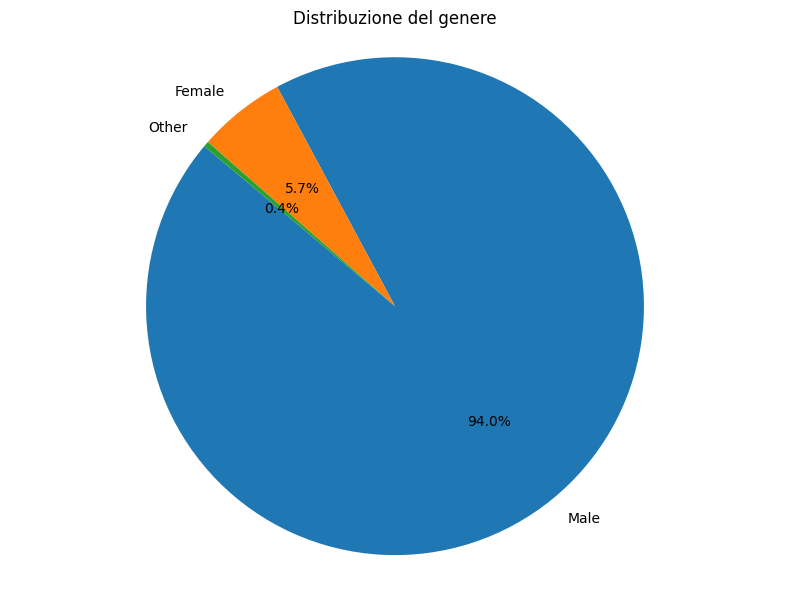

Distribuzione della piattaforma (Platform):
                         count  percent
Platform                               
PC                        9361    99.56
Console (PS, Xbox, ...)     37     0.39
Smartphone / Tablet          4     0.04


In [72]:
# Un solo grafico (Gender) + distribuzione Platform stampata
plt.figure(figsize=(8, 6))

# Gender distribution pie chart
gender_counts = lol_dataset['Gender'].value_counts(dropna=False)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione del genere')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Platform distribution (textual)
platform_counts = lol_dataset['Platform'].value_counts(dropna=False)
platform_pct = lol_dataset['Platform'].value_counts(normalize=True, dropna=False).mul(100).round(2)
platform_dist = pd.DataFrame({'count': platform_counts, 'percent': platform_pct}).sort_values('count', ascending=False)
print('Distribuzione della piattaforma (Platform):')
print(platform_dist)

Dal precedente grafico si può notare un'alta sproporzione tra maschi e femmine nel sondaggio. Nei modelli di machine learning infatti questo dato non vera utilizzato.
Similmente, nella distribuzione delle piattaforme si ha un alto numero di utenti PC, quindi anch'esso non verrà utilizzato per fare distinzioni.

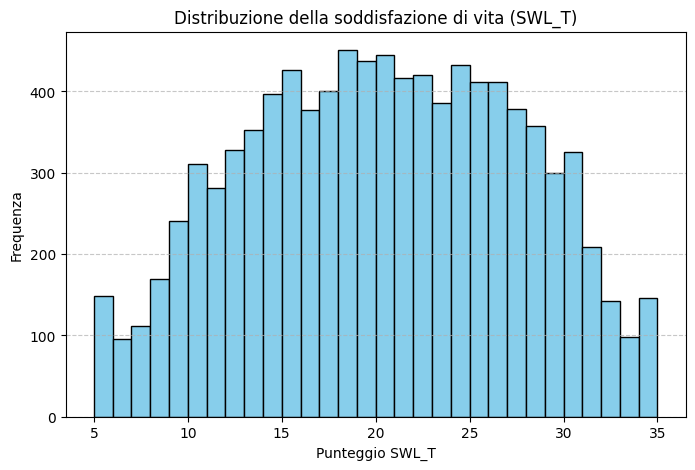

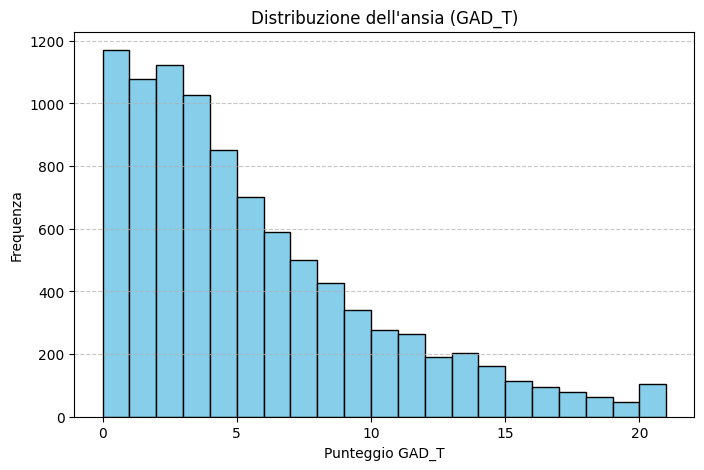

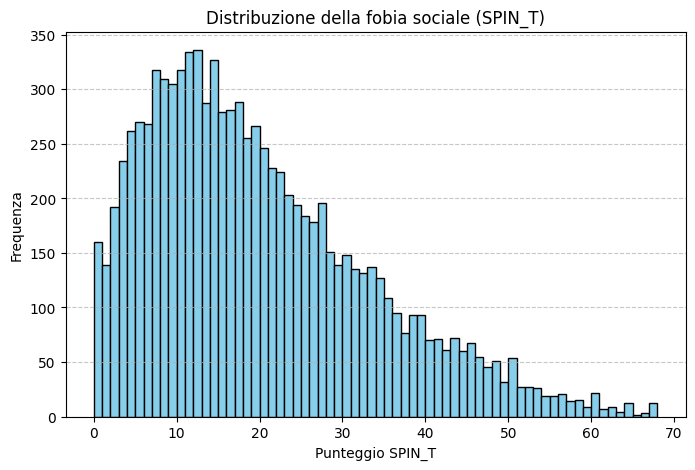

In [73]:
plt.figure(figsize=(8,5))   
plt.hist(lol_dataset['SWL_T'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuzione della soddisfazione di vita (SWL_T)')
plt.xlabel('Punteggio SWL_T')
plt.ylabel('Frequenza')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.figure(figsize=(8,5))   
plt.hist(lol_dataset['GAD_T'], bins=21, color='skyblue', edgecolor='black')
plt.title('Distribuzione dell\'ansia (GAD_T)')
plt.xlabel('Punteggio GAD_T')
plt.ylabel('Frequenza')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.figure(figsize=(8,5))   
plt.hist(lol_dataset['SPIN_T'], bins=68, color='skyblue', edgecolor='black')
plt.title('Distribuzione della fobia sociale (SPIN_T)')
plt.xlabel('Punteggio SPIN_T')
plt.ylabel('Frequenza')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La variabile target SWL_T presenta una distribuzione approssimativamente normale, centrata intorno ai valori medi. Ciò suggerisce che il campione è bilanciato e che i modelli di regressione lineare sono appropriati per la predizione del livello di soddisfazione di vita.

Distribuzione delle League

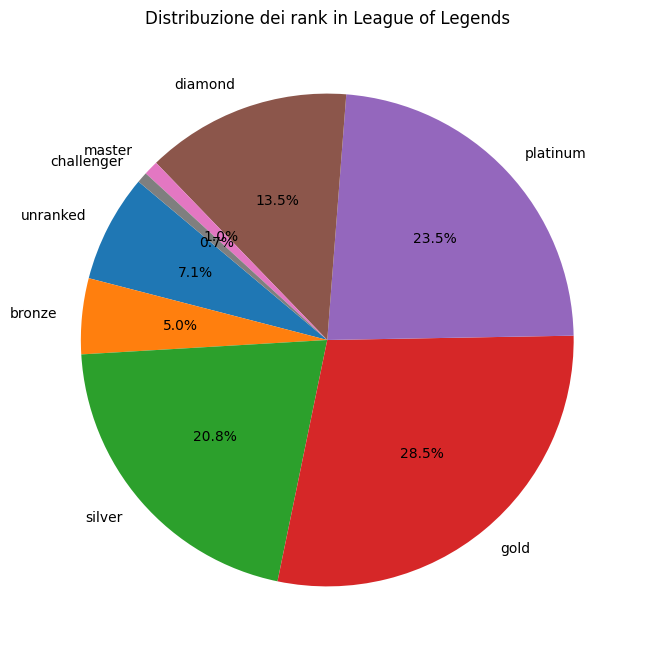

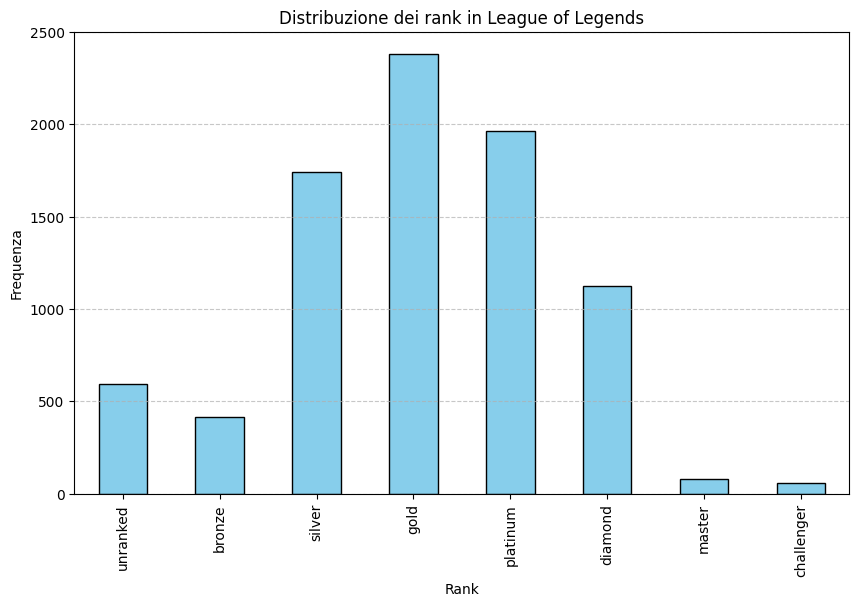

In [74]:
league_counts = lol_dataset['League'].value_counts().sort_index(key=lambda x: x.map(league_order))
league_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8,8))
plt.title('Distribuzione dei rank in League of Legends')
plt.ylabel('')
plt.show()
league_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10,6))
plt.title('Distribuzione dei rank in League of Legends')
plt.xlabel('Rank')
plt.ylabel('Frequenza')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Il grafico mostra che i livelli di competitività più alti hanno meno frequenza e che in media i giocatori di questo dataset si trovano tra silver, gold e platinum.

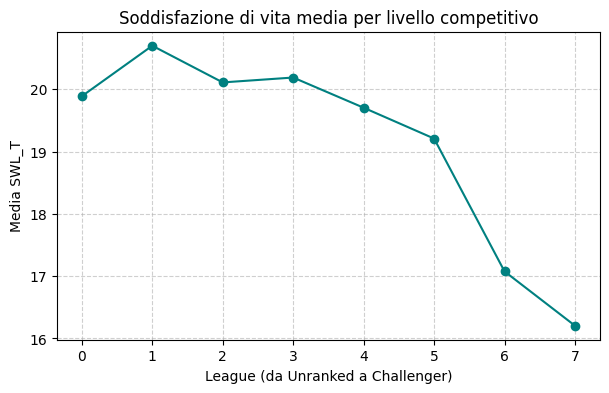

In [75]:
avg_swl = lol_dataset.groupby('League_num')['SWL_T'].mean()

plt.figure(figsize=(7,4))
plt.plot(avg_swl.index, avg_swl.values, marker='o', color='teal')
plt.title('Soddisfazione di vita media per livello competitivo')
plt.xlabel('League (da Unranked a Challenger)')
plt.ylabel('Media SWL_T')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Il grafico mostra che all'aumentare del rank la soddisfazione di vita media diminuisce, ma vi è un bias per colpa di pochissimi giocatori con rango alto.

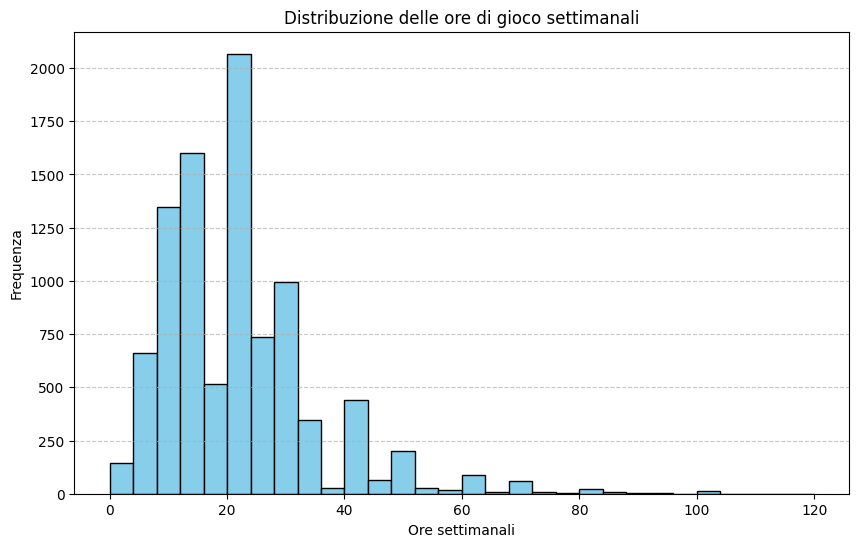

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(lol_dataset['Hours'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuzione delle ore di gioco settimanali')
plt.xlabel('Ore settimanali')
plt.ylabel('Frequenza')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_16408\2092596905.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered.groupby('Hours_bin')['SWL_T'].mean().plot(marker='o')


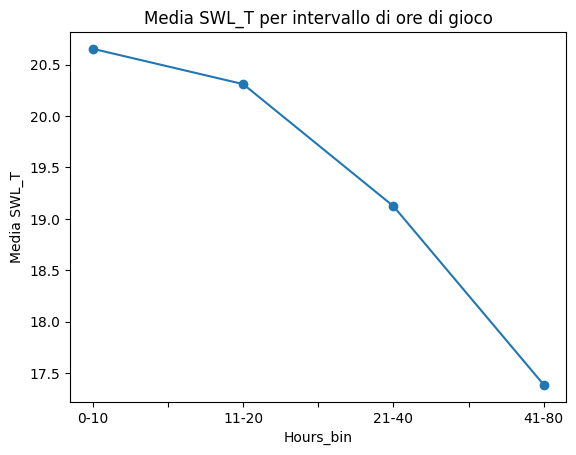

In [77]:
filtered = lol_dataset[lol_dataset['Hours'] <= 80].copy()

filtered.loc[:, 'Hours_bin'] = pd.cut(
    filtered['Hours'],
    bins=[0, 10, 20, 40, 80],
    labels=['0-10', '11-20', '21-40', '41-80']
)
filtered.groupby('Hours_bin')['SWL_T'].mean().plot(marker='o')
plt.ylabel("Media SWL_T")
plt.title("Media SWL_T per intervallo di ore di gioco")
plt.show()

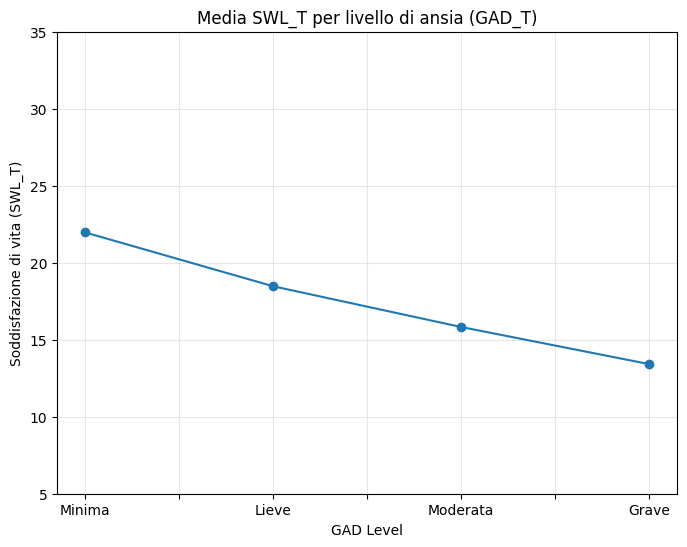

In [78]:
bins_gad = [0, 4, 9, 14, 21]
labels_gad = ['Minima', 'Lieve', 'Moderata', 'Grave']

lol_dataset = lol_dataset.copy()
lol_dataset.loc[:, 'GAD_bin'] = pd.cut(
    lol_dataset['GAD_T'],
    bins=bins_gad,
    labels=labels_gad,
    include_lowest=True
)

gad_grouped = (
    lol_dataset
    .groupby('GAD_bin', observed=True)['SWL_T']
    .mean()
)

plt.figure(figsize=(8,6))
gad_grouped.plot(marker='o')
plt.xlabel("GAD Level")
plt.ylabel("Soddisfazione di vita (SWL_T)")
plt.title("Media SWL_T per livello di ansia (GAD_T)")
plt.grid(alpha=0.3)
plt.ylim(5, 35)
plt.show()

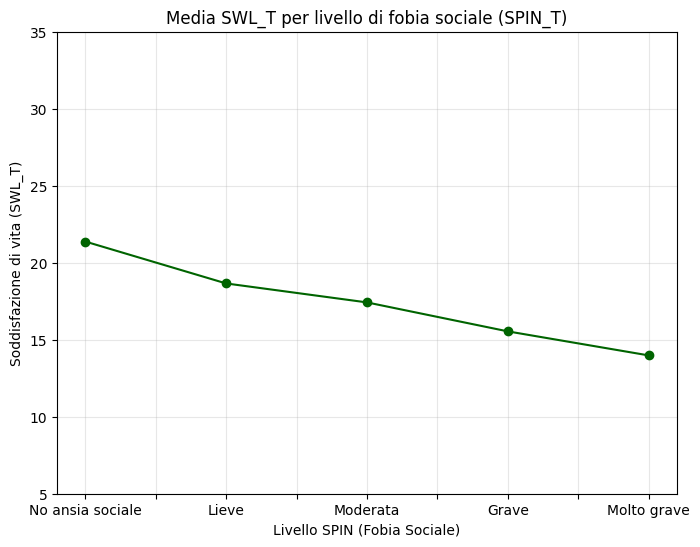

In [79]:
bins_spin = [0, 20, 30, 40, 50, 68]
labels_spin = [
    'No ansia sociale',
    'Lieve',
    'Moderata',
    'Grave',
    'Molto grave'
]

lol_dataset.loc[:, 'SPIN_bin'] = pd.cut(
    lol_dataset['SPIN_T'],
    bins=bins_spin,
    labels=labels_spin,
    include_lowest=True
)

spin_grouped = (
    lol_dataset
    .groupby('SPIN_bin', observed=True)['SWL_T']
    .mean()
)

plt.figure(figsize=(8,6))
spin_grouped.plot(marker='o', color='darkgreen')
plt.xlabel("Livello SPIN (Fobia Sociale)")
plt.ylabel("Soddisfazione di vita (SWL_T)")
plt.title("Media SWL_T per livello di fobia sociale (SPIN_T)")
plt.grid(alpha=0.3)
plt.ylim(5, 35)
plt.show()

## Correlazioni

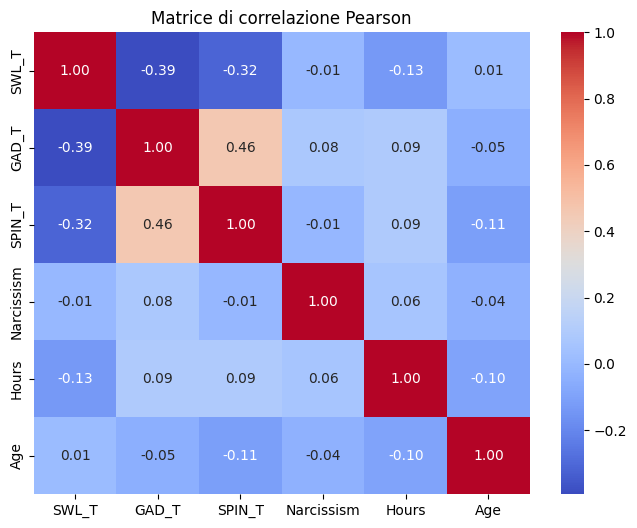

In [80]:
val = ['SWL_T', 'GAD_T', 'SPIN_T', 'Narcissism', 'Hours', 'Age']
corr_matrix = lol_dataset[val].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di correlazione Pearson")
plt.show()

Dalla matrice di correlazione Pearson si può notare una correlazione negativa e moderata tra SWL_T (soddisfazione di vita) e SPIN_T, GAD_T, Hours. Invece si ha una correlazione negativa debole con le ore di gioco settimanali e quasi nulla per gli altri parametri.

# Modelli di regressione

### Preparazione
In questa fase vengono importate le librerie necessarie per la creazione dei modelli, viene effettuata la selezione delle variabili predittive e la standardizzazione di esse per la regressione lineare.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Selezione delle variabili predittive
# Rimuovo colonne non numeriche o con troppe categorie
predictors = ['GAD_T', 'SPIN_T', 'Narcissism', 'Hours', 'Age', 'League_num', 'GADE_num']
# Aggiungo la colonna Work come dummy
predictors += dummies.columns.tolist()
available_predictors = [col for col in predictors if col in lol_dataset.columns]
print("Predittori disponibili:", available_predictors)

# Preparo i dati
X = lol_dataset[available_predictors].copy()
y = lol_dataset['SWL_T'].copy()

# Rimuovo righe con valori mancanti
before_na = len(X)
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]
print(f"Campioni dopo rimozione NA: {len(X)} (erano {before_na})")

# Split train/test
# Primo split -> 80% train, 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Secondo split -> 10% val, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Training set: {len(X_train)}, Test set: {len(X_test)}, Validation set: {len(X_val)}")

# Standardizzazione per la regressione lineare
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Predittori disponibili: ['GAD_T', 'SPIN_T', 'Narcissism', 'Hours', 'Age', 'League_num', 'GADE_num', 'Employed', 'Student at college / university', 'Student at school', 'Unemployed / between jobs']
Campioni dopo rimozione NA: 7938 (erano 9402)
Training set: 6350, Test set: 794, Validation set: 794


### Regressione Lineare

In [82]:
# MODELLO 1: Regressione Lineare
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predizioni
y_pred_lr_val = lr_model.predict(X_val_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Metriche per Regressione Lineare
print("=== REGRESSIONE LINEARE ===")
print(f"R² Validation: {r2_score(y_val, y_pred_lr_val):.4f}")
print(f"RMSE Validation: {np.sqrt(mean_squared_error(y_val, y_pred_lr_val)):.4f}")
print(f"MAE Validation: {mean_absolute_error(y_val, y_pred_lr_val):.4f}")

# Coefficienti
print("\nCoefficienti:")
coef_df = pd.DataFrame({
    'Feature': available_predictors,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

=== REGRESSIONE LINEARE ===
R² Validation: 0.2435
RMSE Validation: 5.9358
MAE Validation: 4.8071

Coefficienti:
                            Feature  Coefficient
0                             GAD_T    -1.479934
10        Unemployed / between jobs    -1.227673
6                          GADE_num    -1.064144
1                            SPIN_T    -1.010882
3                             Hours    -0.426826
8   Student at college / university     0.406856
5                        League_num    -0.375056
7                          Employed     0.257728
9                 Student at school     0.220630
2                        Narcissism     0.190704
4                               Age    -0.040795


### Random Forest

In [83]:
# MODELLO 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Predizioni
y_pred_rf_val = rf_model.predict(X_val)

# Metriche per Random Forest
print("\n=== RANDOM FOREST ===")
print(f"R² Validation: {r2_score(y_val, y_pred_rf_val):.4f}")
print(f"RMSE Validation: {np.sqrt(mean_squared_error(y_val, y_pred_rf_val)):.4f}")
print(f"MAE Validation: {mean_absolute_error(y_val, y_pred_rf_val):.4f}")

# Feature importance
print("\nImportanza delle variabili:")
importance_df = pd.DataFrame({
    'Feature': available_predictors,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importance_df)


=== RANDOM FOREST ===
R² Validation: 0.2103
RMSE Validation: 6.0648
MAE Validation: 4.9148

Importanza delle variabili:
                            Feature  Importance
0                             GAD_T    0.317618
1                            SPIN_T    0.167230
3                             Hours    0.118758
10        Unemployed / between jobs    0.106075
6                          GADE_num    0.080873
4                               Age    0.079780
5                        League_num    0.061581
2                        Narcissism    0.045312
8   Student at college / university    0.010079
7                          Employed    0.008424
9                 Student at school    0.004270


### Gradient Boosting

#### GradientBoostingRegressor da sklearn.ensemble

In [84]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Predizioni
y_pred_gb_val = gb_model.predict(X_val)

r2_gb = r2_score(y_val, y_pred_gb_val)

# Metriche per Gradient Boosting
print("\n=== GRADIENT BOOSTING ===")
print(f"R² Validation: {r2_gb:.4f}")
print(f"RMSE Validation: {np.sqrt(mean_squared_error(y_val, y_pred_gb_val)):.4f}")
print(f"MAE Validation: {mean_absolute_error(y_val, y_pred_gb_val):.4f}")

# Feature importance
print("\nImportanza delle variabili (Gradient Boosting):")
importance_gb_df = pd.DataFrame({
    'Feature': available_predictors,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importance_gb_df)


=== GRADIENT BOOSTING ===
R² Validation: 0.2276
RMSE Validation: 5.9979
MAE Validation: 4.8250

Importanza delle variabili (Gradient Boosting):
                            Feature  Importance
0                             GAD_T    0.361377
1                            SPIN_T    0.154321
10        Unemployed / between jobs    0.129115
6                          GADE_num    0.112379
3                             Hours    0.091625
4                               Age    0.062054
5                        League_num    0.039516
2                        Narcissism    0.031640
8   Student at college / university    0.008789
7                          Employed    0.006000
9                 Student at school    0.003186


#### XGBoost Regressor da xgboost

In [85]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# Predizioni
y_pred_xgb_val = xgb_model.predict(X_val)


r2_xgb = r2_score(y_val, y_pred_xgb_val)

# Metriche per XGBoost
print("\n=== XGBOOST ===")
print(f"R² Validation: {r2_xgb:.4f}")
print(f"RMSE Validation: {np.sqrt(mean_squared_error(y_val, y_pred_xgb_val)):.4f}")
print(f"MAE Validation: {mean_absolute_error(y_val, y_pred_xgb_val):.4f}")

# Feature importance
print("\nImportanza delle variabili (XGBoost):")
importance_xgb_df = pd.DataFrame({
    'Feature': available_predictors,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importance_xgb_df)


=== XGBOOST ===
R² Validation: 0.2228
RMSE Validation: 6.0165
MAE Validation: 4.8330

Importanza delle variabili (XGBoost):
                            Feature  Importance
10        Unemployed / between jobs    0.345936
6                          GADE_num    0.191689
0                             GAD_T    0.169624
1                            SPIN_T    0.047988
8   Student at college / university    0.040464
3                             Hours    0.038005
7                          Employed    0.037547
5                        League_num    0.034825
4                               Age    0.032189
2                        Narcissism    0.031137
9                 Student at school    0.030596


#### Confronto

In [86]:
pct_change = ((r2_xgb - r2_gb) / abs(r2_gb)) * 100 if r2_gb != 0 else float('inf')
print(f"R² Validation XGBoost: {r2_xgb:.4f}")
print(f"R² Validation Gradient Boosting: {r2_gb:.4f}")
print(f"\nVariazione percentuale di R² tra XGBoost e Gradient Boosting: {pct_change:.2f}%")

R² Validation XGBoost: 0.2228
R² Validation Gradient Boosting: 0.2276

Variazione percentuale di R² tra XGBoost e Gradient Boosting: -2.11%


# Ricerca degli iperparametri

È stata effettuata una ricerca degli iperparametri esaustiva tramite Grid search. Per entrambi i metodi si è usata la metrica r2 per il parametro scoring

In [87]:
from sklearn.model_selection import GridSearchCV

### Random Forest

In [88]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Migliori iperparametri per Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Migliori iperparametri per Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


In [89]:
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_val)

print("\n=== Random Forest Ottimizzato Validation set ===")
print(f"R² Validation: {r2_score(y_val, y_pred_best_rf):.4f}")
print(f"RMSE Validation: {np.sqrt(mean_squared_error(y_val, y_pred_best_rf)):.4f}")
print(f"MAE Validation: {mean_absolute_error(y_val, y_pred_best_rf):.4f}")


=== Random Forest Ottimizzato Validation set ===
R² Validation: 0.2369
RMSE Validation: 5.9615
MAE Validation: 4.8652


In [90]:
y_pred_best_rf_test = best_rf.predict(X_test)
print("\n=== Random Forest Ottimizzato Test set ===")
print(f"R² Test: {r2_score(y_test, y_pred_best_rf_test):.4f}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred_best_rf_test)):.4f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_pred_best_rf_test):.4f}")


=== Random Forest Ottimizzato Test set ===
R² Test: 0.2717
RMSE Test: 6.3193
MAE Test: 5.1818


### XGBoost

In [91]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.005, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

print("Migliori iperparametri per XGBoost:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Migliori iperparametri per XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [92]:
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_val)

print("\n=== XGBOOST Ottimizzato Validation set ===")
print(f"R² Validation: {r2_score(y_val, y_pred_best_xgb):.4f}")
print(f"RMSE Validation: {np.sqrt(mean_squared_error(y_val, y_pred_best_xgb)):.4f}")
print(f"MAE Validation: {mean_absolute_error(y_val, y_pred_best_xgb):.4f}")


=== XGBOOST Ottimizzato Validation set ===
R² Validation: 0.2508
RMSE Validation: 5.9072
MAE Validation: 4.7991


In [93]:
y_pred_best_xgb_test = best_xgb.predict(X_test)

print("\n=== XGBOOST Ottimizzato Test set ===")
print(f"R² Test: {r2_score(y_test, y_pred_best_xgb_test):.4f}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred_best_xgb_test)):.4f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_pred_best_xgb_test):.4f}")


=== XGBOOST Ottimizzato Test set ===
R² Test: 0.2819
RMSE Test: 6.2750
MAE Test: 5.1133


## GradientBoostingRegressor

In [94]:
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.005, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gbr = GridSearchCV(gb_model, param_grid_gbr, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_gbr.fit(X_train, y_train)

print("Migliori iperparametri per GradientBoostingRegressor:", grid_search_gbr.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Migliori iperparametri per GradientBoostingRegressor: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [95]:
best_gbr = grid_search_gbr.best_estimator_
y_pred_best_gbr = best_gbr.predict(X_val)

print("\n=== GradientBoostingRegressor Ottimizzato Validation set ===")
print(f"R² Validation: {r2_score(y_val, y_pred_best_gbr):.4f}")
print(f"RMSE Validation: {np.sqrt(mean_squared_error(y_val, y_pred_best_gbr)):.4f}")
print(f"MAE Validation: {mean_absolute_error(y_val, y_pred_best_gbr):.4f}")


=== GradientBoostingRegressor Ottimizzato Validation set ===
R² Validation: 0.2497
RMSE Validation: 5.9114
MAE Validation: 4.8030


In [96]:
y_pred_best_gbr_test = best_gbr.predict(X_test)

print("\n=== GradientBoostingRegressor Ottimizzato Test set ===")
print(f"R² Test: {r2_score(y_test, y_pred_best_gbr_test):.4f}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred_best_gbr_test)):.4f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_pred_best_gbr_test):.4f}")


=== GradientBoostingRegressor Ottimizzato Test set ===
R² Test: 0.2794
RMSE Test: 6.2861
MAE Test: 5.1227


## Confronto

Vediamo che tra tutti, XGBoost è stato il miglior algoritmo

# Interpretazione dei risultati

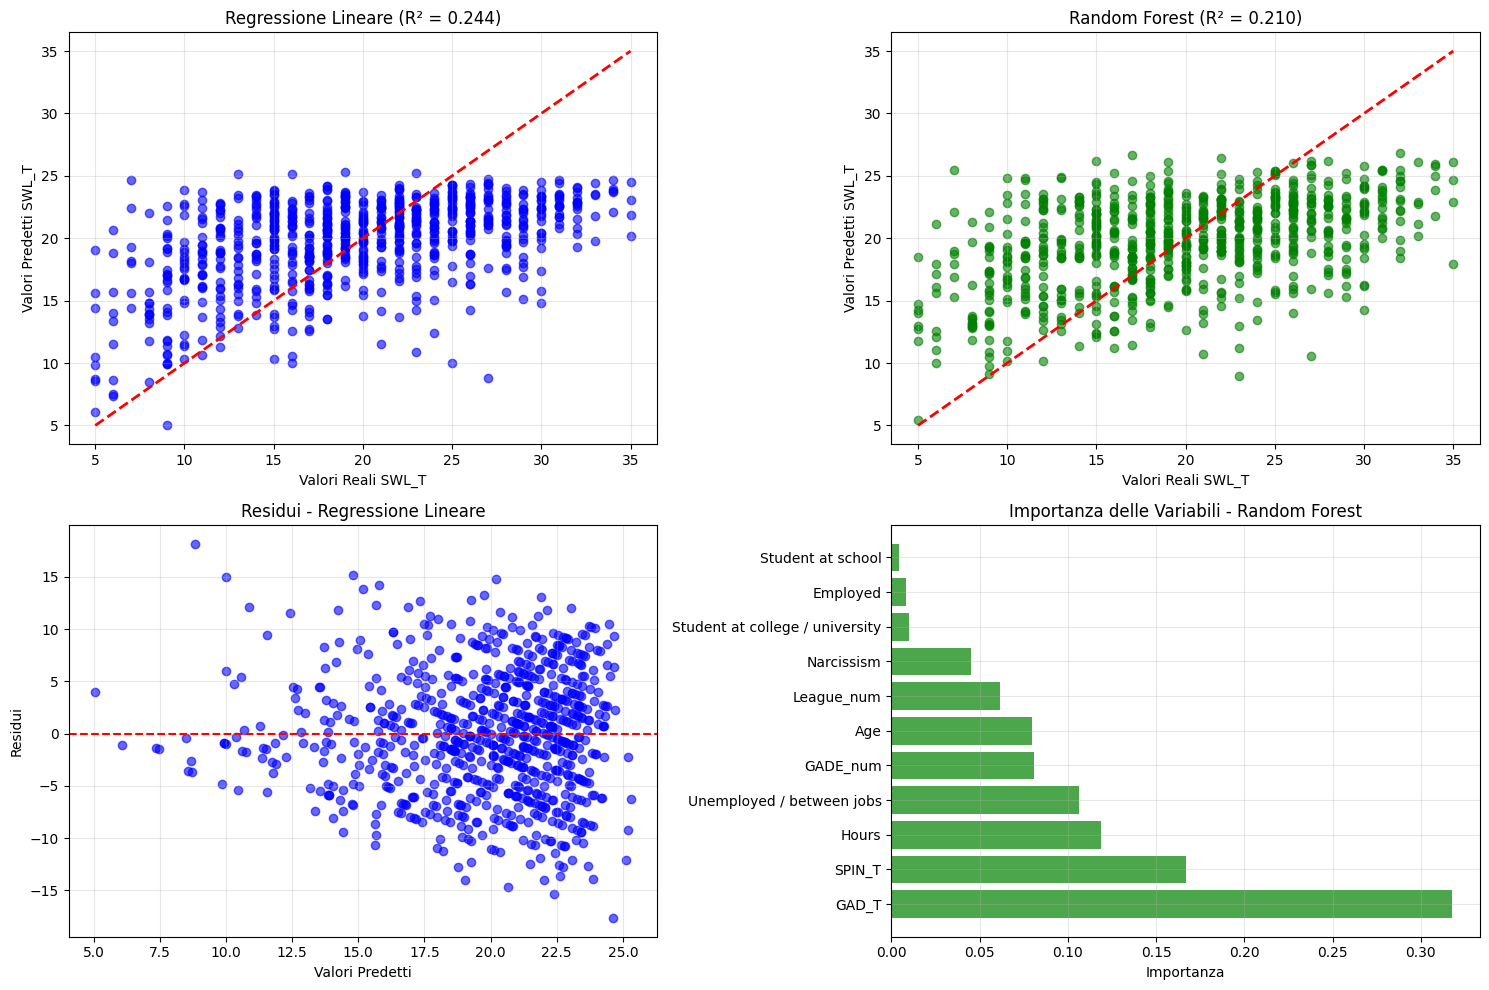

In [97]:
# Visualizzazione dei risultati
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Valori predetti vs valori reali - Regressione Lineare
axes[0,0].scatter(y_val, y_pred_lr_val, alpha=0.6, color='blue')
axes[0,0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Valori Reali SWL_T')
axes[0,0].set_ylabel('Valori Predetti SWL_T')
axes[0,0].set_title(f'Regressione Lineare (R² = {r2_score(y_val, y_pred_lr_val):.3f})')
axes[0,0].grid(True, alpha=0.3)

# 2. Valori predetti vs valori reali - Random Forest
axes[0,1].scatter(y_val, y_pred_rf_val, alpha=0.6, color='green')
axes[0,1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Valori Reali SWL_T')
axes[0,1].set_ylabel('Valori Predetti SWL_T')
axes[0,1].set_title(f'Random Forest (R² = {r2_score(y_val, y_pred_rf_val):.3f})')
axes[0,1].grid(True, alpha=0.3)

# 3. Residui - Regressione Lineare
residuals_lr = y_val - y_pred_lr_val
axes[1,0].scatter(y_pred_lr_val, residuals_lr, alpha=0.6, color='blue')
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Valori Predetti')
axes[1,0].set_ylabel('Residui')
axes[1,0].set_title('Residui - Regressione Lineare')
axes[1,0].grid(True, alpha=0.3)

# 4. Feature Importance - Random Forest
importance_df_plot = importance_df
axes[1,1].barh(importance_df_plot['Feature'], importance_df_plot['Importance'], color='green', alpha=0.7)
axes[1,1].set_xlabel('Importanza')
axes[1,1].set_title('Importanza delle Variabili - Random Forest')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [98]:
# Coefficienti
print("\nCoefficienti regressione lineare:")
coef_df = pd.DataFrame({
    'Feature': available_predictors,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)


Coefficienti regressione lineare:
                            Feature  Coefficient
0                             GAD_T    -1.479934
10        Unemployed / between jobs    -1.227673
6                          GADE_num    -1.064144
1                            SPIN_T    -1.010882
3                             Hours    -0.426826
8   Student at college / university     0.406856
5                        League_num    -0.375056
7                          Employed     0.257728
9                 Student at school     0.220630
2                        Narcissism     0.190704
4                               Age    -0.040795


Il modello di regressione lineare mostra una precisione più alta della Random Forest. Questo potrebbe essere dovuto al fatto che la Random Forest è più sensibile al rumore dei dati oppure l'hypertuning non è ottimale (vedremo dopo che la RF migliorerà con l'ottimizzazione dei parametri).
Il modelli di regressione lineare e Random Forest mostrano una precisione bassa, con R<sup>2</sup> = 0.244 per la regressione. Sebbene sia un valore basso, negli studi psicologici è un valore aspettato poiché il comportamento umano è influenzato da moltissime variabili. Una meta-analisi su oltre 25.000 studi di psicologia sociale[<sup>(3)</sup>](#ref-richard2003) ha mostrato che l’effetto medio osservato in questo campo corrisponde a circa 0.21.

I coefficienti di regressione lineare mostrano principalmente una relazione inversa con la soddisfazione di vita. Questo indica che all'aumentare di una caratteristica si ha la diminuzione della variabile target. In altre parole, l'aumentare dell'ansia (primo coefficiente in tabella) diminuisce la soddisfazione di vita. Si vede che lo stato di disoccupazione (Work_Unemployed), l'affetto del gaming sul lavoro (GADE) e la fobia sociale (SPIN_T) hanno un ruolo importante. Invece, è interessante anche notare come i valori Work_Employed, Work_Student at school e Narcissism hanno un contributo positivo o direttamente proporzionale.

Sul grafico di importanza delle variabili in Random Forest vediamo in cima alla classifica GAD_T, come nella regressione lineare. Diversamente, la RF da più importanza a SPIN_T seguito da Hours e Work_Unemployed


L'importanza delle variabili data dalla Random Forest mostra che l'ansia (GAD) ha una forte importanza sulla soddisfazione di vita, raggiungendo il valore di 0.35. Segue l'ansia sociale (SPIN_T) che contribuisce del 0.15, le ore di gioco settimanali (Hours) di 0.12 e a discendere lo stato lavorativo (Unemployed) del 0.10 circa.
Questo è intuitivamente vero anche nella realtà: l'ansia ha grossa conseguenza sulla soddisfazione di vita, ma è interessante notare come l'occupazione possa influire, mentre le variabili come League hanno meno importanza.
In confronto ai coefficienti di regressione lineare, la random forest dà più importanza a SPIN_T rispetto a Unemployed (senza lavoro).

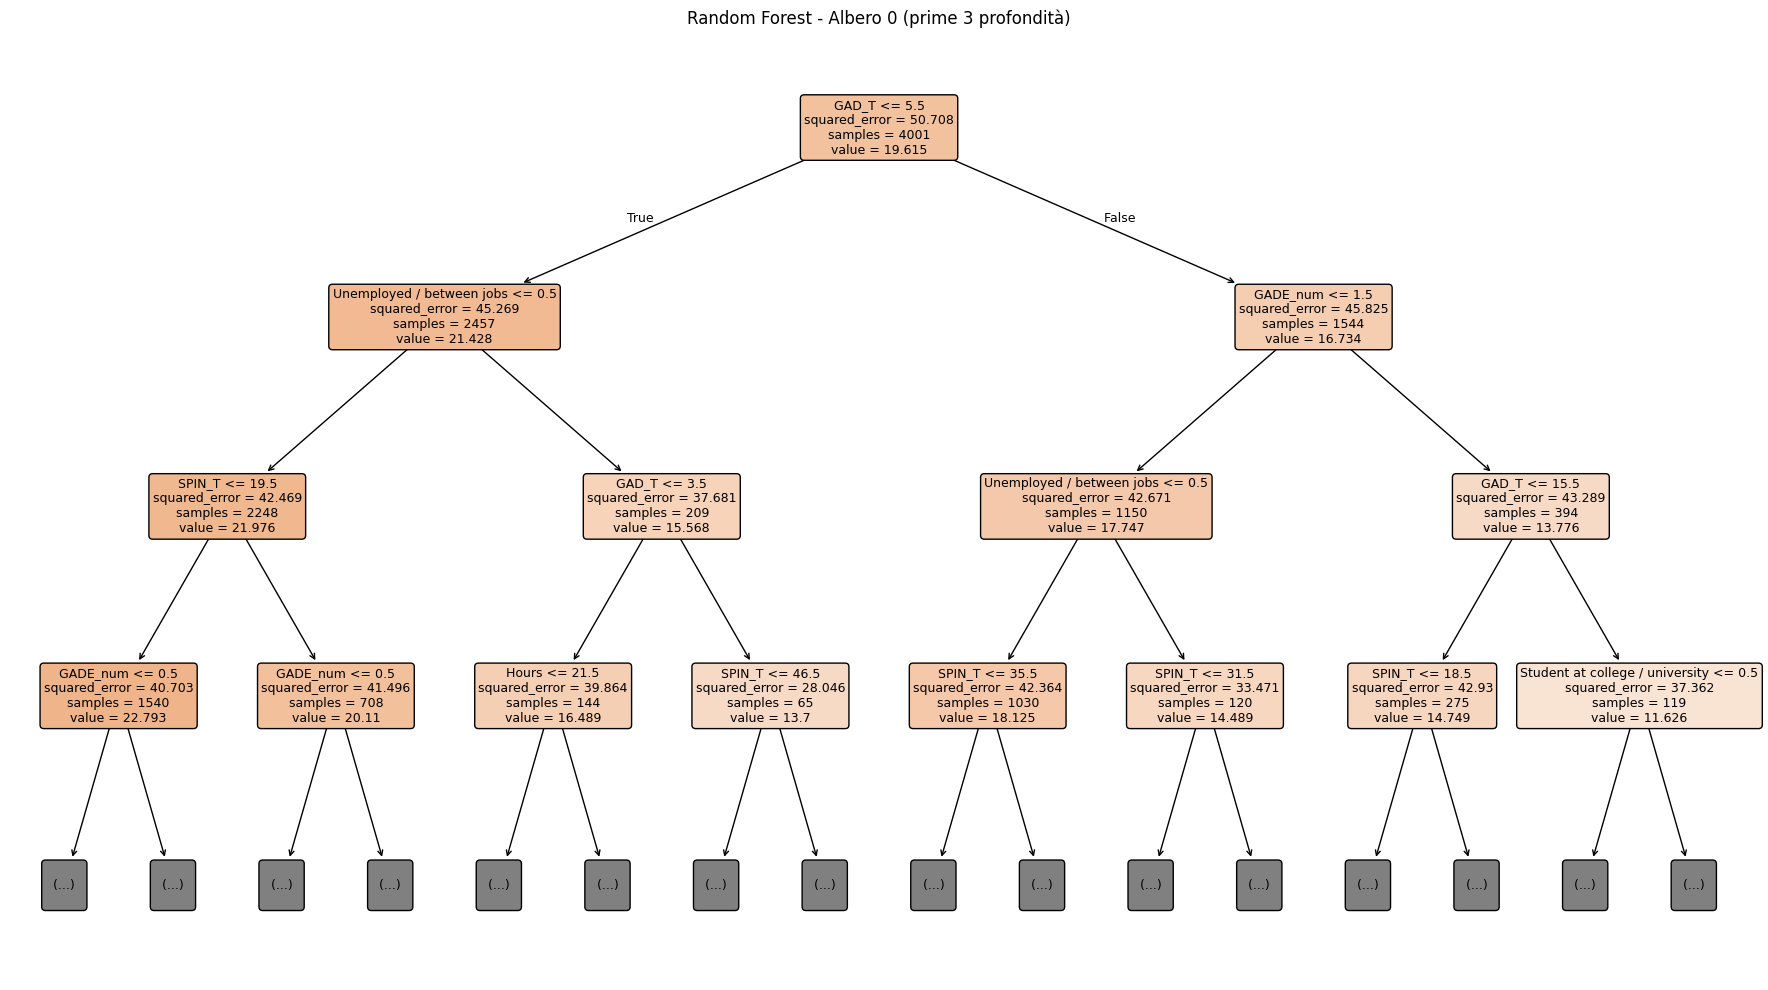

In [99]:
# Visualizza i primi livelli di un albero della Random Forest
from sklearn.tree import plot_tree, export_text

# Parametri regolabili
tree_idx = 0       # cambia per ispezionare un altro albero (0..n_estimators-1)
max_levels = 3     # quanti livelli superiori visualizzare

# Recupera un albero dalla foresta
estimator = rf_model.estimators_[tree_idx]
feature_names = list(available_predictors)

# Grafico dell'albero limitato ai primi livelli
plt.figure(figsize=(18, 10))
plot_tree(
    estimator,
    feature_names=feature_names,
    class_names=None,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=False,
    max_depth=max_levels,
    fontsize=9
)
plt.title(f"Random Forest - Albero {tree_idx} (prime {max_levels} profondità)")
plt.tight_layout()
plt.show()

Questa immagine mostra il funzionamento del modello regressivo Random Forest. Viene illustrato il primo albero e formulati alcuni criteri, il cui primo è sul valore GAD_T. Avviene quindi lo split sui dati, tra quelli che soddisfano la condizione e non, dopodiché continuano ulteriori domande fino a raggiungere i nodi foglia. Arrivati ad essi viene eseguita la predizione, che viene confrontata quella degli altri alberi, fino ad arrivare a una soluzione.

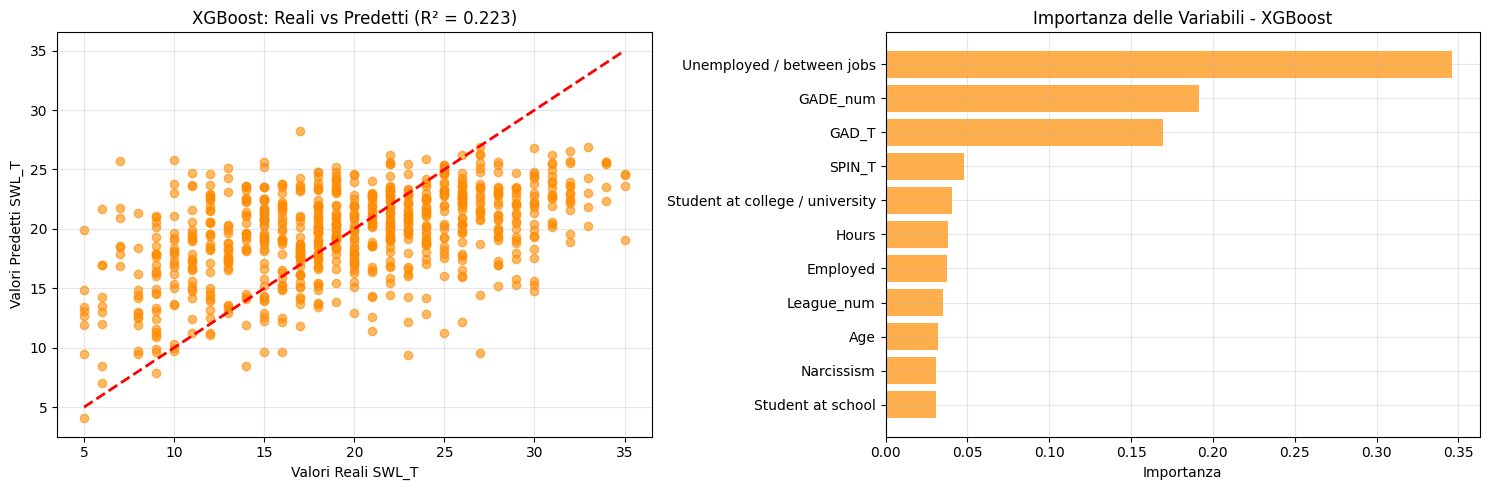

In [100]:
# Grafici XGBoost: Valori reali vs predetti e Importanza variabili
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1) Valori predetti vs reali - XGBoost
axes[0].scatter(y_val, y_pred_xgb_val, alpha=0.6, color='darkorange')
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Valori Reali SWL_T')
axes[0].set_ylabel('Valori Predetti SWL_T')
axes[0].set_title(f'XGBoost: Reali vs Predetti (R² = {r2_score(y_val, y_pred_xgb_val):.3f})')
axes[0].grid(True, alpha=0.3)

# 2) Importanza delle variabili - XGBoost
importance_xgb_plot = importance_xgb_df
axes[1].barh(importance_xgb_plot['Feature'], importance_xgb_plot['Importance'], color='darkorange', alpha=0.7)
axes[1].invert_yaxis()  # feature più importanti in alto
axes[1].set_xlabel('Importanza')
axes[1].set_title('Importanza delle Variabili - XGBoost')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

A differenza dei precedenti modelli, in questa versione non ottimizzata di XGBoost l'importanza della disoccupazione sale al primo posto in classifica, seguita dall'affetto del gaming sul lavoro e l'ansia. 

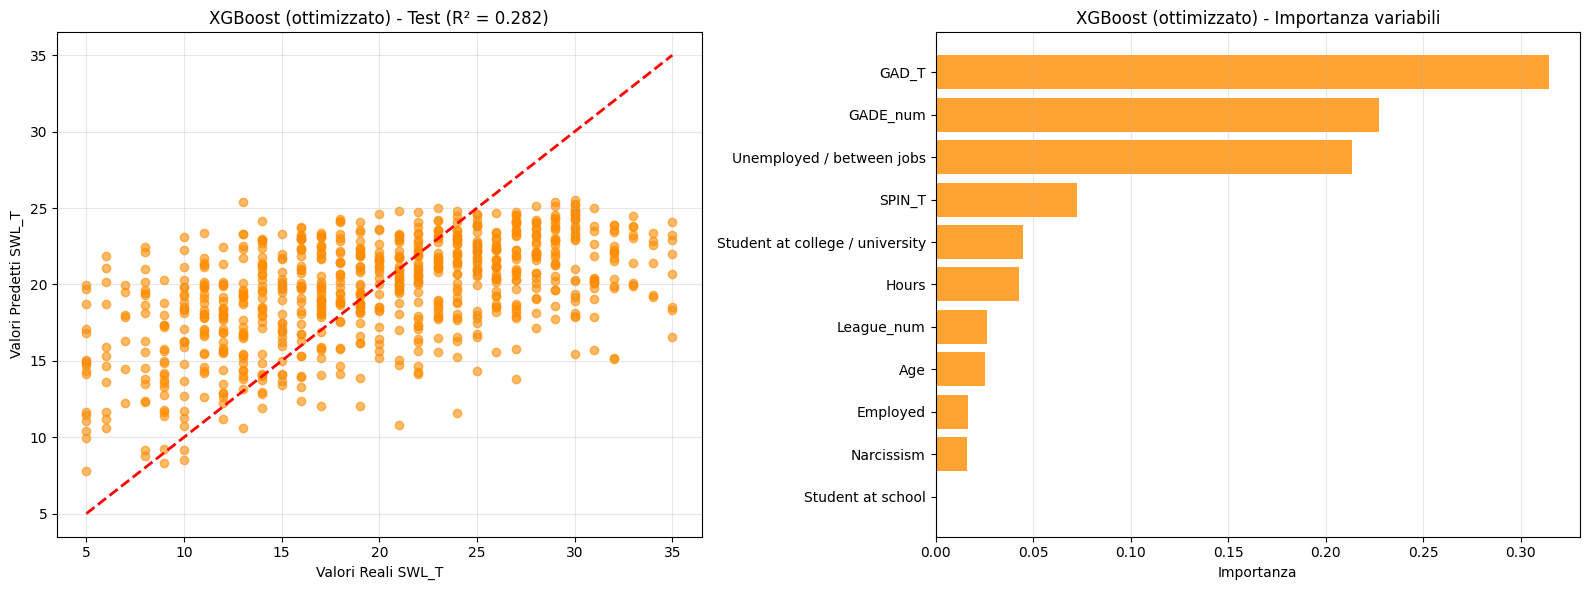

In [101]:
importance_best_xgb_df = pd.DataFrame({
    'Feature': available_predictors,
    'Importance': best_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

# Figure: scatter Reali vs Predetti + Importanze (1 riga, 2 colonne)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 3) XGB ottimizzato: Reali vs Predetti
axes[0].scatter(y_test, y_pred_best_xgb_test, alpha=0.6, color='darkorange')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Valori Reali SWL_T')
axes[0].set_ylabel('Valori Predetti SWL_T')
axes[0].set_title(f'XGBoost (ottimizzato) - Test (R² = {r2_score(y_test, y_pred_best_xgb_test):.3f})')
axes[0].grid(True, alpha=0.3)

# 4) XGB ottimizzato: Importanza variabili
axes[1].barh(importance_best_xgb_df['Feature'], importance_best_xgb_df['Importance'], color='darkorange', alpha=0.8)
axes[1].invert_yaxis()
axes[1].set_xlabel('Importanza')
axes[1].set_title('XGBoost (ottimizzato) - Importanza variabili')
axes[1].grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Con XGBoost ottimizzato vediamo un aumento di precisione, arrivando a R<sup>2</sup>=0.282, che si allinea con il report scientifico[<sup>(2)</sup>](#ref-oparina) che afferma il Gradient Boosting come miglior algoritmo tree-based per la previsione del benessere umano.

Sale in questo caso al primo posto GAD_T (ansia) superando lo 0.30, seguito da GADE (affetto del gaming sul lavoro) che contende il secondo posto con lo stato di disoccupazione. 

# Conclusioni

Sono stati analizzati tre modelli differenti e si è visualizzato il loro comportamento, tra cui XGBoost è stato il migliore.
L'ansia è stata ovviamente la feature più importante nel modello, ma è stato interessante anche riconoscere l'importanza delle altre variabili come disoccupazione e fobia sociale nella predizione della soddisfazione di vita. Il rango competitivo dentro League of Legends in conclusione non ha avuto molto valore nella predizione, come anche l'età.

# Riferimenti bibliografici

1. OSF. (2017). Gaming Study Dataset [Dataset]. OSF. https://osf.io/vnbxk

2. Oparina, E., Kaiser, C., Gentile, N. et al. Machine learning in the prediction of human wellbeing. Sci Rep 15, 1632 (2025). https://doi.org/10.1038/s41598-024-84137-1 <span id="ref-oparina"></span>

3. Richard, F. D., Bond, C. F., & Stokes-Zoota, J. J. (2003). One Hundred Years of Social Psychology Quantitatively Described. Review of General Psychology, 7(4), 331-363. https://doi.org/10.1037/1089-2680.7.4.331 (Original work published 2003) <span id="ref-richard2003"></span>
